In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

In [2]:
def dipole_reflection_radiation(theta, phi, alpha=np.pi/3, kl=1):
    special = np.sin(alpha) * np.cos(phi) * np.sin(theta) + np.cos(alpha) * np.cos(theta)
    r = (np.sin(theta) * np.cos(alpha)) ** 2 + \
        (1 - special ** 2) * np.sin(kl * np.cos(theta)) ** 2 - \
        2 * (np.cos(alpha) - np.cos(theta) * special) * np.cos(alpha) * np.sin(kl * np.cos(theta)) ** 2    
    return r
    
    
    # r = 2 * (np.sin(theta) * np.cos(alpha)) ** 2 + \
    #     2 * (1 - special ** 2) * np.sin(kl * np.cos(theta)) ** 2 - \
    #     4 * (np.cos(alpha) - np.cos(theta) * special) * np.sin(kl * np.cos(theta)) ** 2

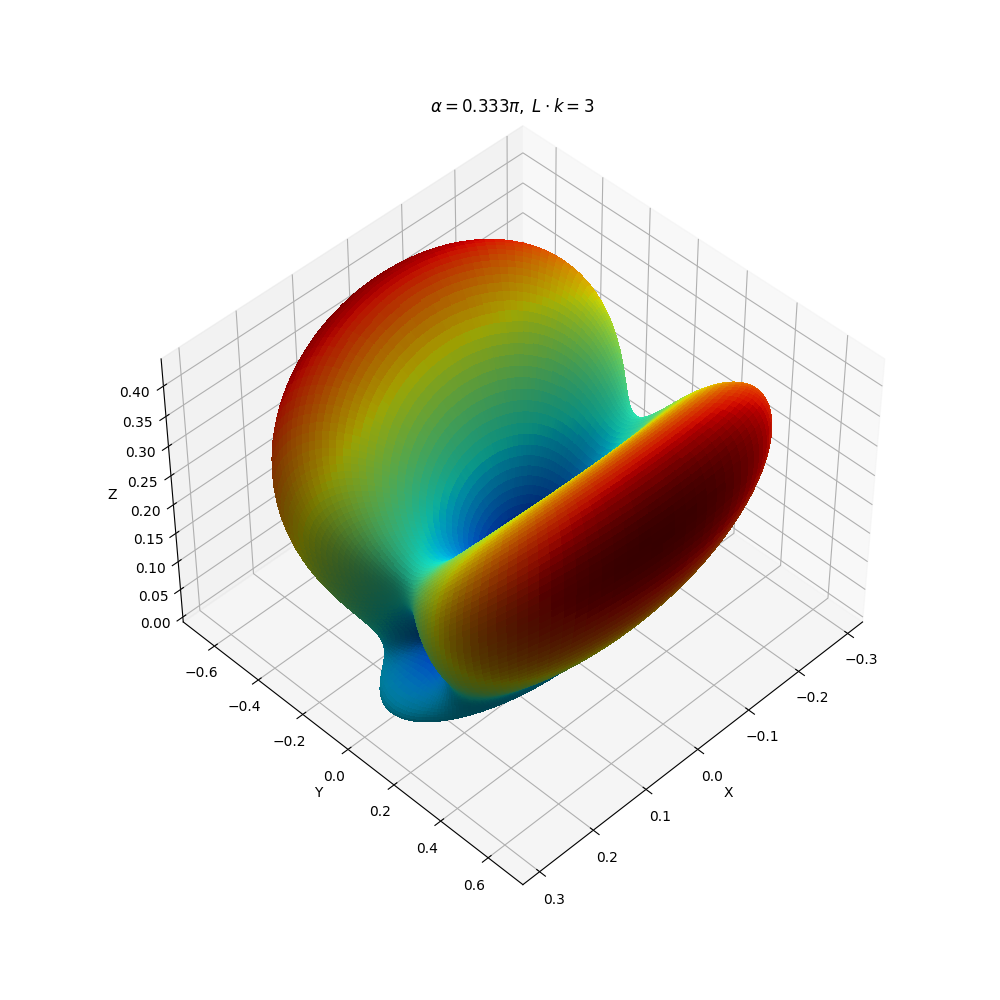

In [4]:
%matplotlib widget

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection='3d')



theta, phi = np.linspace(0, np.pi / 2, 100), np.linspace(0, 2 * np.pi, 200)
THETA, PHI = np.meshgrid(theta, phi)

alpha = np.pi / 3
lk = 3

R = dipole_reflection_radiation(THETA, PHI, alpha, lk)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
R_max = np.max(R)

plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, facecolors=plt.get_cmap('jet')(R / R_max),
    linewidth=0, antialiased=False, alpha=1)


ax.view_init(elev=45, azim=45)
ax.set_title(f"$\\alpha = {np.round(alpha / np.pi, 3)} \pi, \; L \cdot k = {np.round(lk, 3)}$")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
# ax.set_xlim3d(-R_max, R_max)
# ax.set_ylim3d(-R_max, R_max)
# ax.set_zlim3d(0, R_max)

plt.show()

In [63]:
from scipy.integrate import dblquad

def integrf(theta, phi,  alpha=0, kl=2):
    return dipole_reflection_radiation(theta, phi, alpha, kl) * np.sin(theta)

I = dblquad(integrf, 0, 2 * np.pi, 0, np.pi / 2)
print(I, I[0] / 2 / np.pi)

(2.276781440830883, 1.439960176700184e-10) 0.3623610206481227
